In [8]:
import numpy as np
import xarray as xr
c1 = 155 + (190-155)/6 * np.arange(0,6)
c2 = 187 + (205-187)/6 * np.arange(0,6)
for r,g in zip(c1,c2):
    print(int(r),',',int(g))

155 , 187
160 , 190
166 , 193
172 , 196
178 , 199
184 , 202


In [12]:
url = 'http://kage.ldeo.columbia.edu:81/expert/home/.datasets/.ERAInterim/.monthly/.Surface/.msl.nc/.msl/yearly-anomalies/dods'
da = xr.open_dataset(url,decode_times=False)
da['T']



<xarray.DataArray 'T' (T: 456)>
array([  0.5,   1.5,   2.5, ..., 453.5, 454.5, 455.5], dtype=float32)
Coordinates:
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
Attributes:
    pointwidth:  1.0
    bounds:      T
    calendar:    360
    gridtype:    0
    units:       months since 1979-01-01

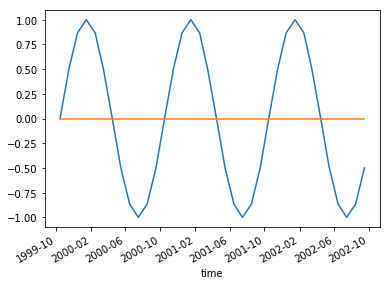

In [44]:
import pytest
import numpy as np
import pandas as pd
import xarray as xr
from ingridlib.time import enso2date
from ingridlib.time import monthlyanomalies, monthlyclimatology
%matplotlib inline

assert enso2date(0) == '1960-1-1'

#with pytest.raises(TypeError):
#    enso2date('str')
    
a = np.arange(0,36)
data = np.sin(2*np.pi*a/12)
time = pd.date_range('16/10/1999', periods=36, freq=pd.DateOffset(months=1))
da = xr.DataArray(data, coords=[time], dims=['time'])
danom = monthlyanomalies(da)
dclim = monthlyclimatology(da)
da.plot()
danom.plot()
#dclim.plot()